## WeatherPy

Analysis

1.	Temperature are highest between latitude -20 and 20 .
2.	Cloudiness and wind speed showed more relevant this time of the year on the northern hemisphere.
3.	There was weak to no relationship between latitude and cloudiness and humidity.


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

622

## Perform API Calls

In [3]:
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key 

# List of city data
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list with one second delay
for i, city in enumerate(cities):
    time.sleep(1)    
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out the max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | whithorn
Processing Record 2 of Set 1 | rikitea
Processing Record 3 of Set 1 | vaitupu
City not found. Skipping...
Processing Record 4 of Set 1 | brae
Processing Record 5 of Set 1 | ushuaia
Processing Record 6 of Set 1 | castro
Processing Record 7 of Set 1 | mattru
Processing Record 8 of Set 1 | saleaula
City not found. Skipping...
Processing Record 9 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 10 of Set 1 | kapaa
Processing Record 11 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 12 of Set 1 | nouadhibou
Processing Record 13 of Set 1 | albany
Processing Record 14 of Set 1 | cap malheureux
Processing Record 15 of Set 1 | jamestown
Processing Record 16 of Set 1 | antalaha
Processing Record 17 of Set 1 | busselton
Processing Record 18 of Set 1 | changde
Processing Record 19 of Set 1 | punta arenas
Processing Record 20 of Set 1 | pangnirtung
Processing 

Processing Record 37 of Set 4 | havelock
Processing Record 38 of Set 4 | burica
City not found. Skipping...
Processing Record 39 of Set 4 | puerto cabezas
Processing Record 40 of Set 4 | beruwala
Processing Record 41 of Set 4 | yanchukan
City not found. Skipping...
Processing Record 42 of Set 4 | nenjiang
Processing Record 43 of Set 4 | melfi
Processing Record 44 of Set 4 | dzerzhinsk
Processing Record 45 of Set 4 | carira
Processing Record 46 of Set 4 | kilindoni
Processing Record 47 of Set 4 | tiksi
Processing Record 48 of Set 4 | hithadhoo
Processing Record 49 of Set 4 | ilulissat
Processing Record 0 of Set 5 | kiruna
Processing Record 1 of Set 5 | piacabucu
Processing Record 2 of Set 5 | victoria
Processing Record 3 of Set 5 | chunskiy
Processing Record 4 of Set 5 | ngukurr
City not found. Skipping...
Processing Record 5 of Set 5 | cape town
Processing Record 6 of Set 5 | kirakira
Processing Record 7 of Set 5 | adrar
Processing Record 8 of Set 5 | temnikov
Processing Record 9 of Se

Processing Record 29 of Set 8 | rorvik
Processing Record 30 of Set 8 | sorong
Processing Record 31 of Set 8 | bilma
Processing Record 32 of Set 8 | klobuck
Processing Record 33 of Set 8 | stuttgart
Processing Record 34 of Set 8 | great falls
Processing Record 35 of Set 8 | bridlington
Processing Record 36 of Set 8 | juifang
City not found. Skipping...
Processing Record 37 of Set 8 | yar-sale
Processing Record 38 of Set 8 | san jose del palmar
Processing Record 39 of Set 8 | warqla
City not found. Skipping...
Processing Record 40 of Set 8 | baykit
Processing Record 41 of Set 8 | vostok
Processing Record 42 of Set 8 | chokurdakh
Processing Record 43 of Set 8 | zaozerne
Processing Record 44 of Set 8 | bonnyville
Processing Record 45 of Set 8 | lethem
Processing Record 46 of Set 8 | boa vista
Processing Record 47 of Set 8 | cozumel
Processing Record 48 of Set 8 | barcelos
Processing Record 49 of Set 8 | vaasa
Processing Record 0 of Set 9 | urumqi
Processing Record 1 of Set 9 | mackay
Proce

Processing Record 17 of Set 12 | moussoro
Processing Record 18 of Set 12 | dinan
Processing Record 19 of Set 12 | pochutla
Processing Record 20 of Set 12 | lac du bonnet
Processing Record 21 of Set 12 | narragansett
Processing Record 22 of Set 12 | valeggio sul mincio
Processing Record 23 of Set 12 | garwolin
Processing Record 24 of Set 12 | richmond
Processing Record 25 of Set 12 | xinan
Processing Record 26 of Set 12 | ucluelet
Processing Record 27 of Set 12 | ouallam
Processing Record 28 of Set 12 | khani
Processing Record 29 of Set 12 | nguiu
City not found. Skipping...
Processing Record 30 of Set 12 | sao miguel do araguaia
Processing Record 31 of Set 12 | neiafu
Processing Record 32 of Set 12 | honningsvag
Processing Record 33 of Set 12 | fethiye
Processing Record 34 of Set 12 | litovko
Processing Record 35 of Set 12 | bad doberan
Processing Record 36 of Set 12 | ye
City not found. Skipping...
Processing Record 37 of Set 12 | cheney
Processing Record 38 of Set 12 | liverpool
Proc

In [4]:
# Convert array of JSONs into Pandas DataFrame
city_data_pd = pd.DataFrame(city_data)

# Extract relevant fields from the data frame
lats = city_data_pd["Lat"]
max_temps = city_data_pd["Max Temp"]
humidity = city_data_pd["Humidity"]
cloudiness = city_data_pd["Cloudiness"]
wind_speed = city_data_pd["Wind Speed"]

# Export the City_Data into a csv
city_data_pd.to_csv(output_data_file, index_label="City_ID")

# Show Record Count
city_data_pd.count()

City          577
Lat           577
Lng           577
Max Temp      577
Humidity      577
Cloudiness    577
Wind Speed    577
Country       577
Date          577
dtype: int64

In [5]:
# Display the City Data Frame
city_data_pd.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,whithorn,18.26,-78.04,84.20,66,20,25.28,JM,1581626563
1,rikitea,-23.12,-134.97,78.75,75,100,15.19,PF,1581626564
2,brae,60.40,-1.35,41.00,86,82,5.82,GB,1581626566
3,ushuaia,-54.80,-68.30,57.20,50,40,14.99,AR,1581626567
4,castro,-24.79,-50.01,71.89,71,38,4.36,BR,1581626568


## Latitude vs. Temperature Plot

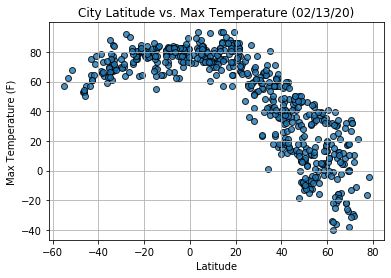

In [6]:
# Build scatter plot for latitude vs. temperature
plt.scatter(lats, 
            max_temps,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Fig1.png")

# Show plot
plt.show()

## Latitude vs. Humidity Plot

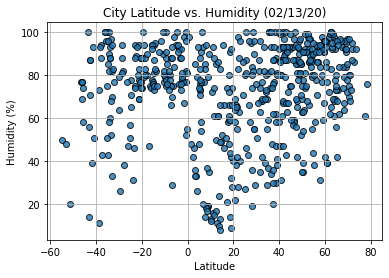

In [7]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(lats, 
            humidity,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Fig2.png")

# Show plot
plt.show()

## Latitude vs. Cloudiness Plot

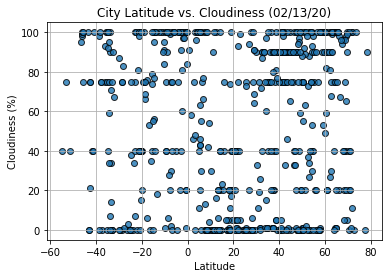

In [8]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(lats, 
            cloudiness,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Fig3.png")

# Show plot
plt.show()

## Latitude vs. Wind Speed Plot

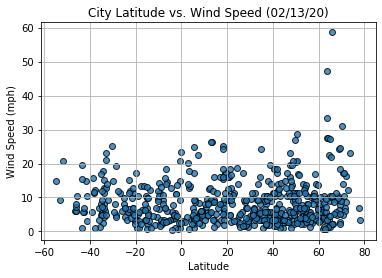

In [9]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(lats, 
            wind_speed,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Fig4.png")

# Show plot
plt.show()

## Linear Regression

In [10]:
#Create a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    
    # Run regresson on southern hemisphere
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(title)
    print(f"The r-squared is: {rvalue}")
    plt.show()

In [11]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemi_df = city_data_pd.loc[(city_data_pd["Lat"] >= 0)]
southern_hemi_df = city_data_pd.loc[(city_data_pd["Lat"] < 0)]

## Max Temp vs. Latitude Linear Regression¶

The r-squared is: -0.8522398911303943


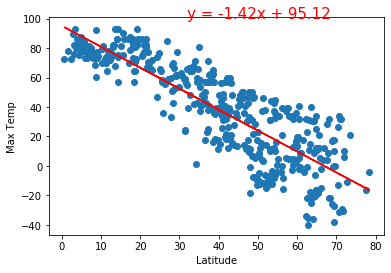

In [12]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Max Temp',(6,40))

The r-squared is: 0.5695032380874877


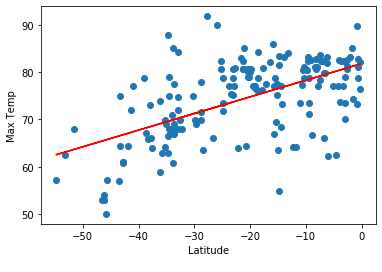

In [13]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Max Temp', (-30,40))

The high r value indicates a strong positive correlation between latitude and max temperature.

## Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.41099110726056365


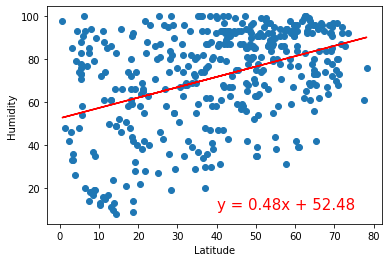

In [14]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity',(40,10))

The r-squared is: 0.29075487255218946


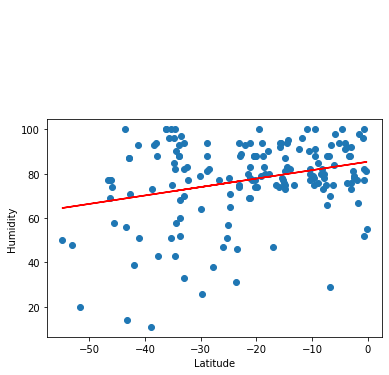

In [15]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity', (-30,150))

The low r values indicate a weak to no relationship between humidity and latitude.

## Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.26014399610921557


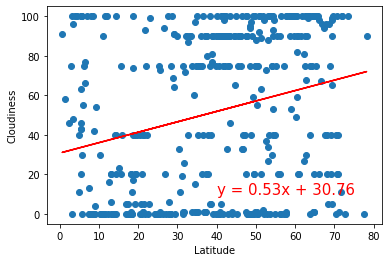

In [16]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness', (40,10))

The r-squared is: 0.11551774835945694


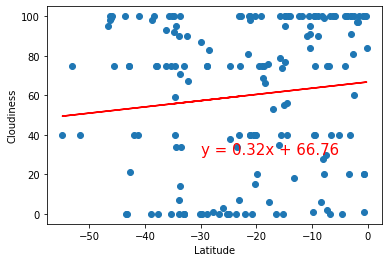

In [17]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness', (-30,30))

The low r values indicate a weak positive relationship between latitude and cloudiness.

## Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.09365219432044142


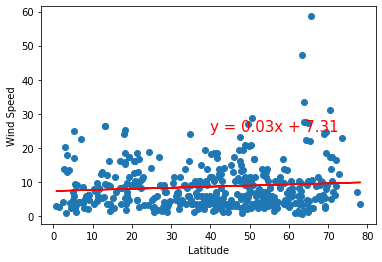

In [18]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed', (40,25))

The r-squared is: -0.1813538950165525


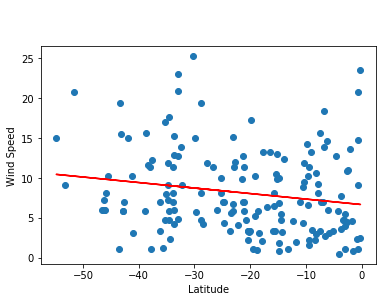

In [19]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed', (-30,30))

The low r values indicate that there is no real relationship between wind speed and latitude." The difference between the hemispheres doesn't seem to be significant enough to comment upon.